In [34]:
from pathlib import Path
from coonectivity_dynamics import evaluate_model
from neurolib.utils.loadData import Dataset
from neurolib.models.aln import ALNModel
from neurolib.utils import functions as func
import numpy as np
from connectivity import make_graph
import matplotlib.pyplot as plt
path = Path("/Users/valery/Downloads/")
ds = Dataset("gw")

In [13]:
corrs = []
for subject in [0, 3, 7]:
    cmat = ds.Cmats[subject]
    dmat = ds.Dmats[subject]
    model = ALNModel(Cmat=cmat, Dmat=dmat)

    # add custom parameter for downsampling results
    # 10 ms sampling steps for saving data, should be multiple of dt
    model.params['save_dt'] = 10.0
    model.params["tauA"] = 600.0
    model.params["sigma_ou"] = 0.1
    model.params["b"] = 20.0

    model.params["Ke_gl"] = 300.0
    model.params["mue_ext_mean"] = 2.5
    model.params["mui_ext_mean"] = 2.0


    model.params['dt'] = 0.1
    model.params['duration'] = 120 * 1000 #ms
    model.params["signalV"] = 80.0

    model.run(bold=True)
   
    fname = f"resting_state_{subject + 1}_sigma_ou_0.1_mue_ext_mean_2.5_mui_ext_mean_2.0"
    folder = path / fname
    folder.mkdir(exist_ok=True)
    fc_real = func.fc(ds.BOLDs[subject])
    fc = func.fc(model.BOLD.BOLD[:, 10:])
    print(f"correlattion subject {subject + 1} {np.corrcoef(fc_real.flatten(), fc.flatten())[0, 1]}")
    corr = evaluate_model(model, cmat, folder, fname, fc_real=fc_real)
    corrs.append(corr)

correlattion 0.6078796033814498
correlattion 0.5964365509197217
correlattion 0.5902838390743559


In [35]:
corr_sc_fc = []
corr_degree_sc_fc = []
for i, (cmat, bold) in enumerate(zip(ds.Cmats, ds.BOLDs)):
    fc = func.fc(model.BOLD.BOLD[:, 10:])
    # print(f"Correlattion SC-FC subject {i + 1} {np.corrcoef(cmat.flatten(), fc.flatten())[0, 1]}")
    corr_sc_fc.append(np.corrcoef(cmat.flatten(), fc.flatten())[0, 1])
    G_cmat = make_graph(cmat)
    strength_cmat = G_cmat.degree(weight='weight')
    strength_cmat = [i[1] for i in list(strength_cmat)]
    G_fc = make_graph(fc)
    strength_fc = G_fc.degree(weight='weight')
    strength_fc = [i[1] for i in list(strength_fc)]
    # print(f"Correlattion degree SC-FC subject {i + 1} {np.corrcoef(strength_cmat, strength_fc)[0, 1]}")
    corr_degree_sc_fc.append(np.corrcoef(strength_cmat, strength_fc)[0, 1])

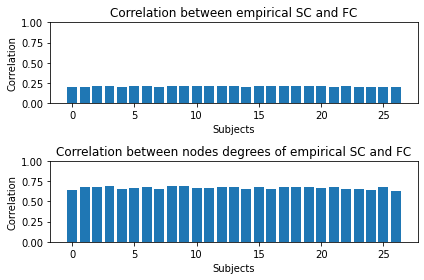

In [48]:
fig, ax = plt.subplots(2, 1)
ax[0].bar(np.arange(27), corr_sc_fc)
ax[0].set_title('Correlation between empirical SC and FC')
ax[0].set_ylabel('Correlation')
ax[0].set_xlabel('Subjects')
ax[0].set_ylim(0, 1)
ax[1].bar(np.arange(27), corr_degree_sc_fc)
ax[1].set_title('Correlation between nodes degrees of empirical SC and FC')
ax[1].set_ylabel('Correlation')
ax[1].set_xlabel('Subjects')
ax[1].set_ylim(0, 1)
plt.tight_layout()

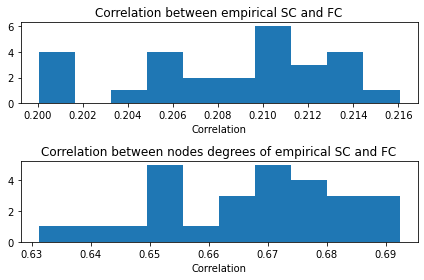

In [52]:
fig, ax = plt.subplots(2, 1)
ax[0].hist(corr_sc_fc)
ax[0].set_title('Correlation between empirical SC and FC')
ax[0].set_xlabel('Correlation')
# ax[0].set_ylabel('Subjects')
# ax[0].set_ylim(0, 1)
ax[1].hist(corr_degree_sc_fc)
ax[1].set_title('Correlation between nodes degrees of empirical SC and FC')
ax[1].set_xlabel('Correlation')
# ax[1].set_ylabel('Subjects')
# ax[1].set_ylim(0, 1)
plt.tight_layout()